In [6]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets

In [7]:
iris = datasets.load_iris()
x_vals = np.array([[x[0], x[3]] for x in iris.data])
y_vals = np.array([1 if y == 0 else -1 for y in iris.target])

train_indices = np.random.choice(len(x_vals), round(len(x_vals) * 0.8), replace=False)
test_indices = np.array(list(set(range(len(x_vals))) - set(train_indices)))
x_vals_train = x_vals[train_indices]
x_vals_test = x_vals[test_indices]
y_vals_train = y_vals[train_indices]
y_vals_test = y_vals[test_indices]

In [19]:
with tf.Session() as sess:
    bs = 100
    lr = 0.01
    it = 500
    
    x_data = tf.placeholder(shape=[None, 2], dtype=tf.float32)
    y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)
    
    A = tf.Variable(tf.random_normal(shape=[2, 1]))
    b = tf.Variable(tf.random_normal(shape=[1, 1]))
    
    model_output = tf.subtract(tf.matmul(x_data, A), b)
    
    l2_norm = tf.reduce_sum(tf.square(A))
    alpha = tf.constant([0.01])
    
    classification_term = tf.reduce_mean(tf.maximum(0., tf.subtract(1.,
                                                        tf.multiply(model_output, y_target))))
    
    loss = tf.add(classification_term, tf.multiply(alpha, l2_norm))
    
    prediction = tf.sign(model_output)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(prediction, y_target), tf.float32))
    
    my_opt = tf.train.GradientDescentOptimizer(lr)
    train_step = my_opt.minimize(loss)
    
    init = tf.global_variables_initializer()
    sess.run(init)
    
    loss_vec = []
    train_accuracy = []
    test_accuracy = []
    for i in range(it):
        rand_index = np.random.choice(len(x_vals_train), size=bs)
        rand_x = x_vals_train[rand_index]
        rand_y = np.transpose([y_vals_train[rand_index]])
        sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
        
        temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
        loss_vec.append(temp_loss)
        
        train_acc_temp = sess.run(accuracy, feed_dict={
            x_data: x_vals_train,
            y_target: np.transpose([y_vals_train]),
        })
        train_accuracy.append(train_acc_temp)
        
        test_acc_temp = sess.run(accuracy, feed_dict={
            x_data: x_vals_test,
            y_target: np.transpose([y_vals_test]),
        })
        test_accuracy.append(test_acc_temp)
        
        if (i + 1) % 100 == 0:
            print('Step #{} A = {}, b = {}'.format(
                str(i + 1),
                str(sess.run(A)),
                str(sess.run(b)),
            ))
            print('Loss = ' + str(temp_loss))
            
    [[a1], [a2]] = sess.run(A)
    [[b]] = sess.run(b)

Step #100 A = [[ 0.05175798]
 [-0.23338123]], b = [[0.97667056]]
Loss = [0.61547107]
Step #200 A = [[ 0.10636462]
 [-0.49428368]], b = [[0.90747046]]
Loss = [0.6778474]
Step #300 A = [[ 0.15189268]
 [-0.73321813]], b = [[0.84527063]]
Loss = [0.41932324]
Step #400 A = [[ 0.20039663]
 [-0.96965265]], b = [[0.78007096]]
Loss = [0.40737557]
Step #500 A = [[ 0.2531257]
 [-1.2088584]], b = [[0.71297115]]
Loss = [0.38000888]


In [22]:
slope = -a2 / a1
y_intercept = b / a1

x1_vals = [d[1] for d in x_vals]

best_fit = []
for i in x1_vals:
    best_fit.append(slope * i + y_intercept)

setosa_x = [d[1] for i, d in enumerate(x_vals) if y_vals[i] == 1]
setosa_y = [d[0] for i, d in enumerate(x_vals) if y_vals[i] == 1]
not_setosa_x = [d[1] for i, d in enumerate(x_vals) if y_vals[i] == -1]
not_setosa_y = [d[0] for i, d in enumerate(x_vals) if y_vals[i] == -1]

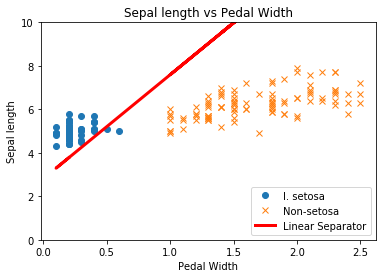

In [23]:
plt.plot(setosa_x, setosa_y, 'o', label='I. setosa')
plt.plot(not_setosa_x, not_setosa_y, 'x', label='Non-setosa')
plt.plot(x1_vals, best_fit, 'r-', label='Linear Separator', linewidth=3)
plt.ylim([0, 10])
plt.legend(loc='lower right')
plt.title('Sepal length vs Pedal Width')
plt.xlabel('Pedal Width')
plt.ylabel('Sepal length')
plt. show()

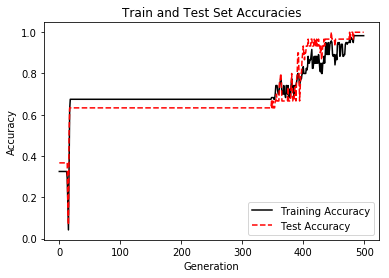

In [24]:
plt.plot(train_accuracy, 'k-', label='Training Accuracy')
plt.plot(test_accuracy, 'r--', label='Test Accuracy')
plt.title('Train and Test Set Accuracies')
plt.xlabel('Generation')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

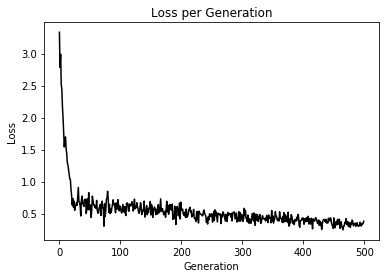

In [25]:
plt.plot(loss_vec, 'k-')
plt.title('Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.show()